In [4]:
!pip3 install numpy
!pip3 install matplotlib

  Using cached matplotlib-3.7.1-cp310-cp310-macosx_11_0_arm64.whl (7.3 MB)
  Using cached fonttools-4.39.4-py3-none-any.whl (1.0 MB)
  Using cached contourpy-1.0.7-cp310-cp310-macosx_11_0_arm64.whl (229 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-macosx_11_0_arm64.whl (63 kB)


In [ ]:
# x elem [-1,1] as f(x) = sin(64|x|^4) - (x - 0.2)^2

In [10]:
import numpy as np
import matplotlib.pyplot as plt

(1000, 1000)
(1000, 1000)
(1000, 1000)


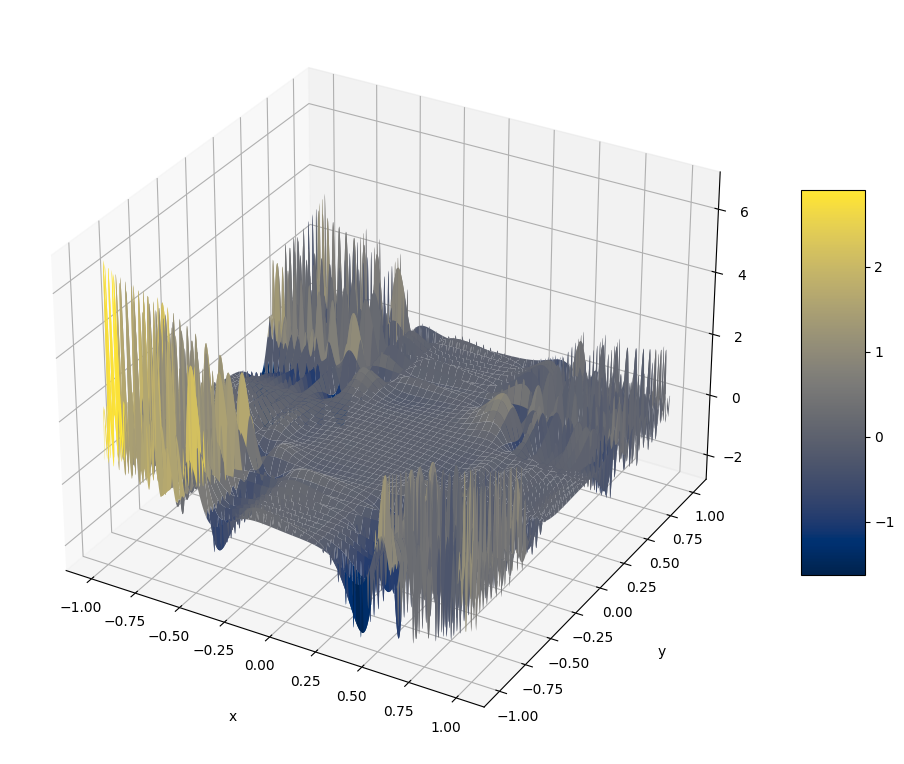

In [129]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.linspace(-1, 1, 1000)
y = np.linspace(-1, 1, 1000)

@np.vectorize
def objective(x,y):
    first_term = (np.sin(65 * np.power(np.abs(x),4)) - np.power((x-0.3),2))
    second_term = (np.sin(65 * np.power(np.abs(y),4)) - np.power((y-0.3),2))
    Z = first_term * second_term
    return Z

X, Y = np.meshgrid(x, y)
Z = objective(X,Y)

print(X.shape)
print(Y.shape)
print(Z.shape)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=6)

plt.show()

In [223]:
X = np.random.uniform(low=0.25, high=1, size=(1000,))
Y = np.random.uniform(low=0.5, high=1, size=(1000,))
Z = objective(X,Y)

In [224]:
data = np.column_stack((X, Y, Z))
training_data = data[:900,]
validation_data = data[900:1000,]
#testing_data = data[450:500,]

(1000, 1000)
(1000, 1000)
(1000, 1000)


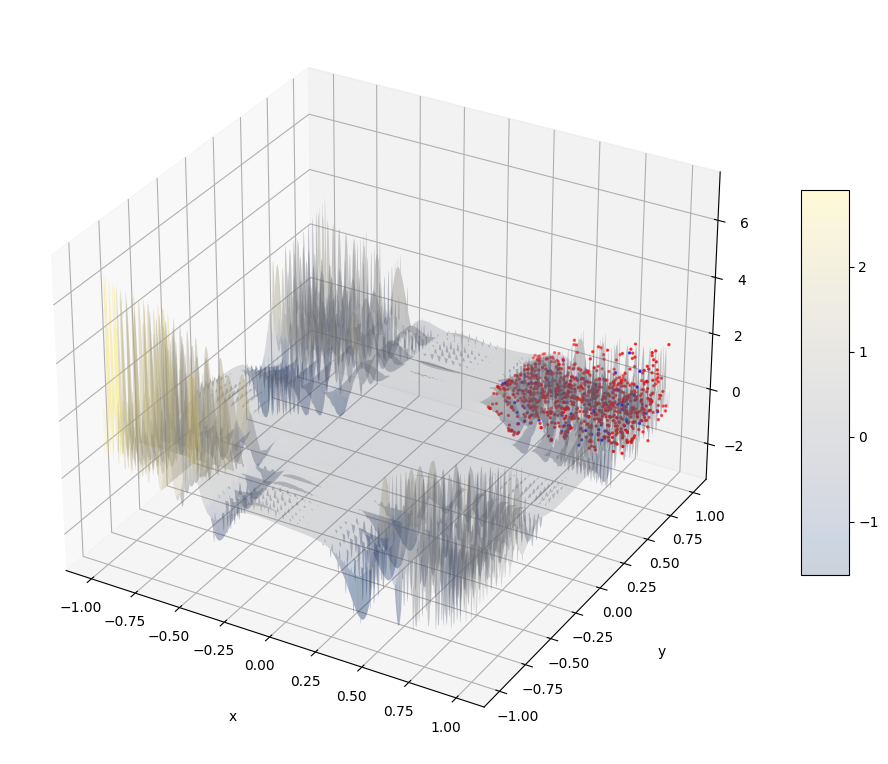

In [225]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.linspace(-1, 1, 1000)
y = np.linspace(-1, 1, 1000)

@np.vectorize
def objective(x,y):
    first_term = (np.sin(65 * np.power(np.abs(x),4)) - np.power((x-0.3),2))
    second_term = (np.sin(65 * np.power(np.abs(y),4)) - np.power((y-0.3),2))
    Z = first_term * second_term
    return Z

X, Y = np.meshgrid(x, y)
Z = objective(X,Y)

print(X.shape)
print(Y.shape)
print(Z.shape)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis, alpha=0.2)

# plot the training data
ax.scatter(training_data[:,0], training_data[:,1], training_data[:,2], c='r', s=2)
ax.scatter(validation_data[:,0], validation_data[:,1], validation_data[:,2], c='b', s=2)


# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [114]:
!pip3 install torch torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 MB 5.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.1 MB/s eta 0:00:000:00:010:00:01:01
  Using cached filelock-3.12.0-py3-none-any.whl (10 kB)
  Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
  Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


In [226]:
import torch
from torch import nn, optim

In [227]:
class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()
        self.encoder_hidden_layer = nn.Linear(
            in_features=kwargs["input_shape"], out_features=128
        )
        self.encoder_output_layer = nn.Linear(
            in_features=128, out_features=2
        )
        self.decoder_hidden_layer = nn.Linear(
            in_features=2, out_features=128
        )
        self.decoder_output_layer = nn.Linear(
            in_features=128, out_features=kwargs["input_shape"]
        )

    def forward(self, features):
        activation = self.encoder_hidden_layer(features)
        activation = torch.relu(activation)
        code = self.encoder_output_layer(activation)
        code = torch.relu(code)
        activation = self.decoder_hidden_layer(code)
        activation = torch.relu(activation)
        activation = self.decoder_output_layer(activation)
        reconstructed = torch.relu(activation)
        return reconstructed

In [228]:
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = AE(input_shape=3).to(device)

# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# mean-squared error loss
criterion = nn.MSELoss()

In [229]:
from torch.utils.data import TensorDataset, DataLoader

In [232]:
tensor_train = torch.Tensor(training_data)
tensor_validation = torch.Tensor(validation_data)
# tensor_test = torch.Tensor(testing_data)

In [233]:
dataset_train = TensorDataset(tensor_train)
dataset_validation = TensorDataset(tensor_validation)
# dataset_test = TensorDataset(tensor_testing)

In [234]:
loader_train = torch.utils.data.DataLoader(
    dataset_train, batch_size=128, shuffle=True, num_workers=4, pin_memory=True
)
loader_validation = torch.utils.data.DataLoader(
    dataset_validation, batch_size=8, shuffle=False, num_workers=4, pin_memory=True
)
# loader_test = torch.utils.data.DataLoader(
#     dataset_test, batch_size=8, shuffle=False, num_workers=4, pin_memory=True
# )

In [235]:
next(iter(loader_train));

In [236]:
epochs = 60
loss_list_train = []
loss_list_validation = []
for epoch in range(epochs):
    loss = 0
    for batch_features in loader_train:
        # reshape mini-batch data to [N, 3] matrix
        # load it to the active device
        batch_features = batch_features[0].view(-1, 3).to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features)
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()

    loss_validation = 0
    with torch.no_grad():
        for batch_features in loader_validation:
            # reshape mini-batch data to [N, 3] matrix
            # load it to the active device
            batch_features = batch_features[0].view(-1, 3).to(device)
            
            # compute reconstructions
            outputs = model(batch_features)
            
            # compute training reconstruction loss
            validation_loss = criterion(outputs, batch_features)
            
            # add the mini-batch training loss to epoch loss
            loss_validation += validation_loss.item()
    

        
    # compute the epoch training loss
    loss = loss / len(loader_train)
    loss_validation = loss_validation / len(loader_validation)
    loss_list_train.append(loss)
    loss_list_validation.append(loss_validation)
    # display the epoch training loss
    print("epoch : {}/{}, training loss = {:.6f}, validation loss = {:.6f}".format(epoch + 1, epochs, loss, loss_validation))

epoch : 1/60, training loss = 0.441969, validation loss = 0.447806
epoch : 2/60, training loss = 0.406750, validation loss = 0.374094
epoch : 3/60, training loss = 0.321028, validation loss = 0.290172
epoch : 4/60, training loss = 0.282319, validation loss = 0.283121
epoch : 5/60, training loss = 0.282409, validation loss = 0.270185
epoch : 6/60, training loss = 0.249255, validation loss = 0.262323
epoch : 7/60, training loss = 0.248145, validation loss = 0.259112
epoch : 8/60, training loss = 0.245896, validation loss = 0.255756
epoch : 9/60, training loss = 0.253802, validation loss = 0.254716
epoch : 10/60, training loss = 0.245081, validation loss = 0.252945
epoch : 11/60, training loss = 0.241113, validation loss = 0.251693
epoch : 12/60, training loss = 0.250739, validation loss = 0.249702
epoch : 13/60, training loss = 0.241452, validation loss = 0.247726
epoch : 14/60, training loss = 0.240000, validation loss = 0.246284
epoch : 15/60, training loss = 0.230074, validation loss 